<a href="https://colab.research.google.com/github/eodnjsdl21/colaboratory/blob/main/t_test%EA%B2%80%EC%A0%952.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

T-test 검정 

귀무가설: 남녀의 1_회 평균매출액은 같다
대립가설: 남녀의 1_회 평균매출액은 다르다

목차 
 - 기술통계를 통해 결측값 예측 
 - 결측값처리 
 - 1표본 t검정
 - 2표본 t검정 

In [ ]:
#패키지 설치 
!pip install pingouin
!pip install scikit_posthocs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.0/188.0 KB 4.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 64.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pingouin: filename=pingouin-0.5.3-py3-none-any.whl size=198588 sha256=d279b8ff89e81082e76b7cff22fa51be7551abf21ea1c209f345d228dd5e9076
  Stored in directory: /root/.cache/pip/wheels/60/1e/21/710be95d0c93ea9ac3c0e6bacd8cce492ad5dd26bf3aedc4bf
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7047 sha256=3789b254d8a6fba647c871e6846984c5f5ac9492e9080870adffb61fd10a92cb
  Stored in directory: /root/.cache/pip/wheels/6a/33/c4/0ef84d7f5568c2823e3d63a6e08988852fb9e4bc822034870a
Successfully built pingouin littleuti

In [ ]:
#통계 및 t-test필요 모듈 다운 
from matplotlib import pyplot as plt
from pandas import DataFrame
import numpy as np
import pandas as pd
import math
import sklearn.preprocessing 
from scipy import stats
import pingouin as pg
import scikit_posthocs
import scipy as sp
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [27]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Ashopping2.csv", encoding='cp949') #encoding = "utf-8"
df

,고객ID,이탈여부,총_매출액,방문빈도,1회_평균매출액,할인권_사용 횟수,총_할인_금액,고객등급,구매유형,클레임접수여부,...,매장_청결성,공간_편의성,시야_확보성,음향_적절성,안내_표지판_설명,친절성,신속성,책임성,정확성,전문성
0,1,0,4007080,17,235711,1,5445,1,4,0,...,6,7,6,6,6,6,6,6,6,6
1,2,1,3168400,14,226314,22,350995,2,4,0,...,7,7,6,6,6,5,3,6,6,6
2,3,0,2680780,18,148932,6,186045,1,4,1,...,6,6,6,6,6,7,7,6,6,7
3,4,0,5946600,17,349800,1,5195,1,4,1,...,6,6,5,6,6,6,6,6,5,6
4,5,0,13745950,73,188301,9,246350,1,2,0,...,5,6,6,6,5,5,6,6,5,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,0,5135090,8,641886,3,44445,1,3,1,...,6,6,7,6,7,6,6,6,6,6
996,997,0,10315690,49,210524,6,186545,1,2,0,...,6,7,6,5,6,5,7,6,6,6
997,998,0,2741290,10,274129,8,260700,2,4,0,...,5,6,6,6,5,6,4,5,6,5
998,999,0,11268990,15,751266,20,347700,1,3,0,...,5,4,4,4,4,4,5,5,4,4


In [31]:
df.columns

Index(['고객ID', '이탈여부', '총_매출액', '방문빈도', '1회_평균매출액', '할인권_사용 횟수', '총_할인_금액',
       '고객등급', '구매유형', '클레임접수여부', '구매_카테고리_수', '거주지역', '성별', '고객_나이대', '거래기간',
       '할인민감여부', '멤버쉽_프로그램_가입전_만족도', '멤버쉽_프로그램_가입후_만족도', 'Recency',
       'Frequency', 'Monetary', '상품_만족도', '매장_만족도', '서비스_만족도', '상품_품질',
       '상품_다양성', '가격_적절성', '상품_진열_위치', '상품_설명_표시', '매장_청결성', '공간_편의성',
       '시야_확보성', '음향_적절성', '안내_표지판_설명', '친절성', '신속성', '책임성', '정확성', '전문성'],
      dtype='object')

In [32]:
#Ttest 실시 
#2표본 Ttest실시 (남,여) p- value: 0.05실시 
#귀무가설: 남여에 따른 monetaty의 평균은 동일할 것이다 x(남) = x(여)
#대립가설: 남여에 따른 monetary의 평균은 다르다. x(남) != X(여)

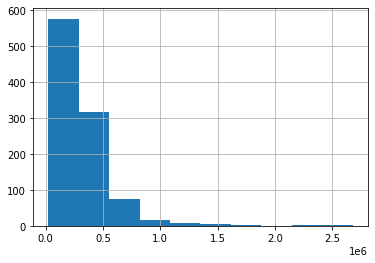

In [71]:
#기술통계를 통한 예측: hist()
df["1회_평균매출액"].hist()

BP(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7ff1d8b116d0>, lines={'whiskers': [<matplotlib.lines.Line2D object at 0x7ff1d8a72a90>, <matplotlib.lines.Line2D object at 0x7ff1d8a72df0>], 'caps': [<matplotlib.lines.Line2D object at 0x7ff1d8a85190>, <matplotlib.lines.Line2D object at 0x7ff1d8a854f0>], 'boxes': [<matplotlib.lines.Line2D object at 0x7ff1d8a72730>], 'medians': [<matplotlib.lines.Line2D object at 0x7ff1d8a85850>], 'fliers': [<matplotlib.lines.Line2D object at 0x7ff1d8a85b50>], 'means': []})

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54924 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54217 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52636 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50529 missing from current font.
  font.set_

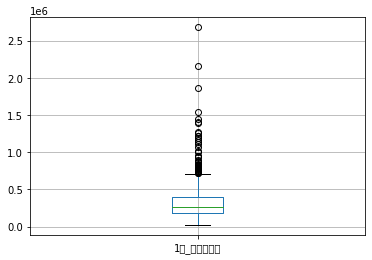

In [72]:
#결측값 정리를 위해서 기술통계 이용 : boxplot
df.boxplot(column="1회_평균매출액",  return_type="both")

In [73]:
#결측값을 확인 했으므로 4분위를 통해서 이상값 제거
q1 = df["1회_평균매출액"].quantile(q=0.25)
q3 = df["1회_평균매출액"].quantile(q=0.75)
IQR = q3-q1
IQR

215517.5

In [74]:
# 1.5범위를 지정하여 결측값을 제거한 데이터를 data_IQR에 따로 저장 
data_IQR = df[(df["1회_평균매출액"] < q3 + IQR * 1.5) & (df["1회_평균매출액"] > q1 - IQR * 1.5)]
data_IQR

,고객ID,이탈여부,총_매출액,방문빈도,1회_평균매출액,할인권_사용 횟수,총_할인_금액,고객등급,구매유형,클레임접수여부,...,시야_확보성,음향_적절성,안내_표지판_설명,친절성,신속성,책임성,정확성,전문성,Monetary_scale,Monetary_minmax
0,1,0,4007080,17,235711,1,5445,1,4,0,...,6,6,6,6,6,6,6,6,-0.081856,0.023198
1,2,1,3168400,14,226314,22,350995,2,4,0,...,6,6,6,5,3,6,6,6,-0.662397,0.011986
2,3,0,2680780,18,148932,6,186045,1,4,1,...,6,6,6,7,7,6,6,7,-1.242937,0.005467
3,4,0,5946600,17,349800,1,5195,1,4,1,...,5,6,6,6,6,6,5,6,0.498684,0.049128
4,5,0,13745950,73,188301,9,246350,1,2,0,...,6,6,5,5,6,6,5,6,1.659765,0.153399
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,995,0,12390390,20,619520,23,380395,1,3,0,...,6,5,6,7,6,6,6,6,1.079225,0.135276
995,996,0,5135090,8,641886,3,44445,1,3,1,...,7,6,7,6,6,6,6,6,-0.081856,0.038279
996,997,0,10315690,49,210524,6,186545,1,2,0,...,6,5,6,5,7,6,6,6,1.079225,0.107539
997,998,0,2741290,10,274129,8,260700,2,4,0,...,6,6,5,6,4,5,6,5,-1.242937,0.006276


In [75]:
#결측값들을 확인해 보자 
#1사분위 * 1.5 아래
data_outlier = df[(df["1회_평균매출액"] < q1- IQR * 1.5)]
data_outlier
#3사분위 * 1.5 위
data_outlier = df[(df["1회_평균매출액"] > q3+ IQR * 1.5)]
data_outlier


,고객ID,이탈여부,총_매출액,방문빈도,1회_평균매출액,할인권_사용 횟수,총_할인_금액,고객등급,구매유형,클레임접수여부,...,시야_확보성,음향_적절성,안내_표지판_설명,친절성,신속성,책임성,정확성,전문성,Monetary_scale,Monetary_minmax
18,19,1,8421390,9,935710,16,365845,1,3,1,...,5,6,7,6,6,5,6,6,1.079225,0.082214
25,26,0,3648320,5,729664,23,380845,2,3,1,...,5,6,5,6,6,5,5,5,-0.662397,0.018402
29,30,0,9062030,12,755169,28,375900,1,3,1,...,6,6,5,6,5,6,6,5,1.079225,0.090779
61,62,0,19067940,23,829041,28,376150,1,3,1,...,6,6,5,4,5,5,5,5,1.659765,0.224549
71,72,1,6636750,7,948107,28,377345,2,3,1,...,4,4,4,4,5,5,4,4,0.498684,0.058355
72,73,1,9773200,7,1396171,23,379595,2,3,0,...,6,6,7,5,7,6,6,6,1.079225,0.100286
85,86,0,17404230,23,756706,22,351245,2,3,1,...,7,6,5,3,5,7,6,7,1.659765,0.202307
108,109,0,42489170,54,786836,18,341200,1,3,0,...,5,6,5,6,6,5,5,5,1.659765,0.537672
176,177,1,10720400,4,2680100,7,210695,2,3,1,...,6,6,6,6,6,6,6,6,1.079225,0.112950
246,247,0,7121100,9,791233,7,210945,2,3,1,...,4,6,5,5,6,5,5,6,0.498684,0.064830


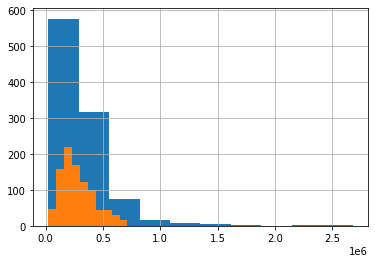

In [76]:
#기술통계를 통해서 결측값 제거후의 히스토그램 확인 
df["1회_평균매출액"].hist()
data_IQR["1회_평균매출액"].hist()
 

# 1번째: Ttest를 위한 정규성은 인정 (후에 독립성 및 등분산 검정)

In [51]:
# 성별을 기준으로 평균, 분산, 표준편차 비교 
print(df.groupby("성별").mean())
print(df.groupby("성별").var())
print(df.groupby("성별").std())

          고객ID     이탈여부         총_매출액       방문빈도       1회_평균매출액  할인권_사용 횟수  \
성별                                                                           
0   508.281879  0.09396  7.816790e+06  26.033557  335545.912752  15.986577   
1   499.137485  0.06228  6.937706e+06  26.701528  314177.203290  16.034078   

          총_할인_금액      고객등급      구매유형   클레임접수여부  ...    매장_청결성    공간_편의성  \
성별                                               ...                       
0   290337.114094  1.315436  3.134228  0.067114  ...  5.738255  5.838926   
1   292727.896592  1.257344  3.085781  0.527615  ...  5.766157  5.883666   

      시야_확보성    음향_적절성  안내_표지판_설명       친절성       신속성       책임성       정확성  \
성별                                                                          
0   5.731544  5.825503   5.718121  5.456376  5.476510  5.724832  5.630872   
1   5.702703  5.807286   5.696827  5.370153  5.418331  5.662750  5.531140   

         전문성  
성별            
0   5.583893  
1   5.515864  

[2 rows x 38

In [53]:
#변수의 표준화 작업을 위해서 필요한거 import 
import math
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler 
from scipy.stats import boxcox

In [77]:
# 전처리 preprocessing 데이터 생성
df["1회_평균매출액_scale"] = preprocessing.scale(df["1회_평균매출액"])

In [78]:
# 전처리 데이터 확인 
df["1회_평균매출액_scale"].describe()

count    1.000000e+03
mean    -2.309264e-17
std      1.000500e+00
min     -1.277035e+00
25%     -6.028146e-01
50%     -2.370465e-01
75%      3.304617e-01
max      1.023160e+01
Name: 1회_평균매출액_scale, dtype: float64

In [79]:
# Minmax 스캐일링 작업 
scaler = MinMaxScaler()
df_minmax = scaler.fit_transform(df)
df_minmax
df_minmax = pd.DataFrame(df_minmax)
df["1회_평균매출액_minmax"] = df_minmax[2]

In [80]:
# Minmax 스캐일링 값 확인 
df["1회_평균매출액_minmax"]
#결과: 값들이 0과 1사이로 전처리 된 것을 확인할 수 있다. 

0      0.023198
1      0.011986
2      0.005467
3      0.049128
4      0.153399
         ...   
995    0.038279
996    0.107539
997    0.006276
998    0.120284
999    0.012179
Name: 1회_평균매출액_minmax, Length: 1000, dtype: float64

In [81]:
#전처리 후 최대 최소가 잘 적용이 되었는지 확인 
df.columns
#마지막 두개 monetary_scale, monetart_minmax가 잘 적용되어 있다는 것을 알 수 있다. 

Index(['고객ID', '이탈여부', '총_매출액', '방문빈도', '1회_평균매출액', '할인권_사용 횟수', '총_할인_금액',
       '고객등급', '구매유형', '클레임접수여부', '구매_카테고리_수', '거주지역', '성별', '고객_나이대', '거래기간',
       '할인민감여부', '멤버쉽_프로그램_가입전_만족도', '멤버쉽_프로그램_가입후_만족도', 'Recency',
       'Frequency', 'Monetary', '상품_만족도', '매장_만족도', '서비스_만족도', '상품_품질',
       '상품_다양성', '가격_적절성', '상품_진열_위치', '상품_설명_표시', '매장_청결성', '공간_편의성',
       '시야_확보성', '음향_적절성', '안내_표지판_설명', '친절성', '신속성', '책임성', '정확성', '전문성',
       'Monetary_scale', 'Monetary_minmax', '1회_평균매출액_scale',
       '1회_평균매출액_minmax'],
      dtype='object')

In [87]:
#추가적을 1표본 검사를 해보자 
#평균예측: 317222
# 실제 평균을 출력하고 그 것을 예측 값과 비교해보자 
# 그리고 유의미하게 예측했는지 t-test 검증 진행
print(df["1회_평균매출액"].mean())

print(stats.ttest_1samp(df["1회_평균매출액"], 317222))
#p -value 값에 따라서  귀무가설을 채택한다. 

317361.141
Ttest_1sampResult(statistic=0.019044324795633182, pvalue=0.9848095485467621)


In [88]:
df["1회_평균매출액"]

0      235711
1      226314
2      148932
3      349800
4      188301
        ...  
995    641886
996    210524
997    274129
998    751266
999    138386
Name: 1회_평균매출액, Length: 1000, dtype: int64

In [90]:
# 성별을 기준으로 2표본 검사 
women = df[df["성별"]==0]
women
men = df[df["성별"]==1]
men

,고객ID,이탈여부,총_매출액,방문빈도,1회_평균매출액,할인권_사용 횟수,총_할인_금액,고객등급,구매유형,클레임접수여부,...,안내_표지판_설명,친절성,신속성,책임성,정확성,전문성,Monetary_scale,Monetary_minmax,1회_평균매출액_scale,1회_평균매출액_minmax
0,1,0,4007080,17,235711,1,5445,1,4,0,...,6,6,6,6,6,6,-0.081856,0.023198,-0.353578,0.023198
1,2,1,3168400,14,226314,22,350995,2,4,0,...,6,5,3,6,6,6,-0.662397,0.011986,-0.394270,0.011986
2,3,0,2680780,18,148932,6,186045,1,4,1,...,6,7,7,6,6,7,-1.242937,0.005467,-0.729365,0.005467
3,4,0,5946600,17,349800,1,5195,1,4,1,...,6,6,6,6,5,6,0.498684,0.049128,0.140473,0.049128
5,6,0,3323610,26,127831,20,348145,1,4,0,...,5,5,5,6,6,5,-0.662397,0.014061,-0.820741,0.014061
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,994,0,10963470,19,577025,20,348145,1,3,0,...,7,4,5,7,7,6,1.079225,0.116199,1.124448,0.116199
994,995,0,12390390,20,619520,23,380395,1,3,0,...,6,7,6,6,6,6,1.079225,0.135276,1.308468,0.135276
995,996,0,5135090,8,641886,3,44445,1,3,1,...,7,6,6,6,6,6,-0.081856,0.038279,1.405321,0.038279
998,999,0,11268990,15,751266,20,347700,1,3,0,...,4,4,5,5,4,4,1.079225,0.120284,1.878980,0.120284


In [94]:
#남여 각각의 1회평균매출액 출력 
print(women["1회_평균매출액"].mean())
print(men["1회_평균매출액"].mean())

335545.91275167785
314177.2032902468


In [96]:
#1회 평균의 타입의 개수 파악
df["1회_평균매출액"].describe()

count    1.000000e+03
mean     3.173611e+05
std      2.310413e+05
min      2.246100e+04
25%      1.781558e+05
50%      2.626210e+05
75%      3.936732e+05
max      2.680100e+06
Name: 1회_평균매출액, dtype: float64

In [99]:
#성별의 타입의 개수 파악 
df["성별"].describe()

count    1000.000000
mean        0.851000
std         0.356267
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: 성별, dtype: float64

In [116]:
#Ttest를 할 수 있는지 남녀 별로 평균매출액을 넣어서 분산이 같은지를 분석
#예상: 당연히 등분산을 만족한다고는 생각한다. 
df1 = df[["성별", "1회_평균매출액"]]
pd.options.display.float_format = '{:.3f}'.format
#남, 여 성별로 그룹하여 저장한다. 
df_male = df[df["성별"] == 0]
df_female = df[df["성별"]== 1]

In [111]:
#남 녀 각각의 등분산을 검정 
sp.stats.levene(df_male["1회_평균매출액"], df_female["1회_평균매출액"])
#결과: 등분산이다 . -> Ttest에서 true를 적용한다. 

LeveneResult(statistic=0.6488764966102929, pvalue=0.4207065257467312)

In [115]:
#t-test 진행 
print(stats.ttest_ind(df_male["1회_평균매출액"], df_female["1회_평균매출액"]))
#결과 
#p-value가 0.05보다 크기 때문에 귀마가설이 채택 -> 남 녀의 1회_평균매출액은 같다 .

Ttest_indResult(statistic=1.041513944586696, pvalue=0.2978893204458846)
